## Deuflhard Function

In [1]:
using Pkg
Pkg.activate("../../.")
using Globtim
using DynamicPolynomials, DataFrames
using ProgressLogging

  Activating project at `~/globtim`


In [2]:
# Constants and Parameters
const n, a, b = 2, 7, 5
f = Deuflhard # Objective function

Deuflhard (generic function with 1 method)

In [3]:
d = 8 # Initial Degree 
SMPL = 100 # Number of samples
center = [0.0, 0.0]
TR = test_input(f,
                dim=n,
                center=[0.0, 0.0],
                GN=SMPL,
                sample_range=[1.2, 1.5]
                )
pol_cheb = Constructor(TR, d, basis=:chebyshev)
pol_lege = Constructor(TR, d, basis=:legendre);


current L2-norm: 21.424220743089837
current L2-norm: 15.108014624778525


In [4]:
@polyvar(x[1:n]) # Define polynomial ring 
real_pts_cheb = solve_polynomial_system(
    x, n, d, pol_cheb.coeffs;
    basis=pol_cheb.basis,
    precision=pol_cheb.precision,
    normalized=false,
    power_of_two_denom=pol_cheb.power_of_two_denom
)

real_pts_lege = solve_polynomial_system(
    x, n, d, pol_lege.coeffs;
    basis=pol_lege.basis,
    precision=pol_lege.precision,
    normalized=true)

df_cheb = process_crit_pts(real_pts_cheb, f, TR)
df_lege = process_crit_pts(real_pts_lege, f, TR)

Tracking 49 paths...   4%|█▎                            |  ETA: 0:01:11



Tracking 49 paths... 100%|██████████████████████████████| Time: 0:00:03
  # paths tracked:                  49
  # non-singular solutions (real):  49 (13)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         49 (13)
Tracking 49 paths...   4%|█▎                            |  ETA: 0:00:18



Tracking 49 paths... 100%|██████████████████████████████| Time: 0:00:00
  # paths tracked:                  49
  # non-singular solutions (real):  49 (21)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         49 (21)


Row,x1,x2,z
,Float64,Float64,Float64
1,0.964884,0.913678,14.2605
2,0.576934,1.12996,10.8937
3,-0.546579,1.14957,4.35653
4,1.05998,0.716852,11.3054
5,-0.728276,0.833521,0.205883
6,0.735304,0.868961,7.18343
7,0.499227,-0.398524,2.27712
8,-2.74365e-17,-1.64467e-15,4.0
9,-0.499227,0.398524,2.27712


In [5]:
using Optim
df_cheb, df_min_cheb = analyze_critical_points(f, df_cheb, TR, tol_dist=0.001);
df_lege, df_min_lege = analyze_critical_points(f, df_lege, TR, tol_dist=0.001);

Processing point 1 of 13
Error processing point 1: UndefVarError(:BFGS, Globtim)
Processing point 2 of 13
Error processing point 2: UndefVarError(:BFGS, Globtim)
Processing point 3 of 13
Error processing point 3: UndefVarError(:BFGS, Globtim)
Processing point 4 of 13
Error processing point 4: UndefVarError(:BFGS, Globtim)
Processing point 5 of 13
Error processing point 5: UndefVarError(:BFGS, Globtim)
Processing point 6 of 13
Error processing point 6: UndefVarError(:BFGS, Globtim)
Processing point 7 of 13
Error processing point 7: UndefVarError(:BFGS, Globtim)
Processing point 8 of 13
Error processing point 8: UndefVarError(:BFGS, Globtim)
Processing point 9 of 13
Error processing point 9: UndefVarError(:BFGS, Globtim)
Processing point 10 of 13
Error processing point 10: UndefVarError(:BFGS, Globtim)
Processing point 11 of 13
Error processing point 11: UndefVarError(:BFGS, Globtim)
Processing point 12 of 13
Error processing point 12: UndefVarError(:BFGS, Globtim)
Processing point 13 of

In [6]:
using CairoMakie
CairoMakie.activate!

activate! (generic function with 1 method)

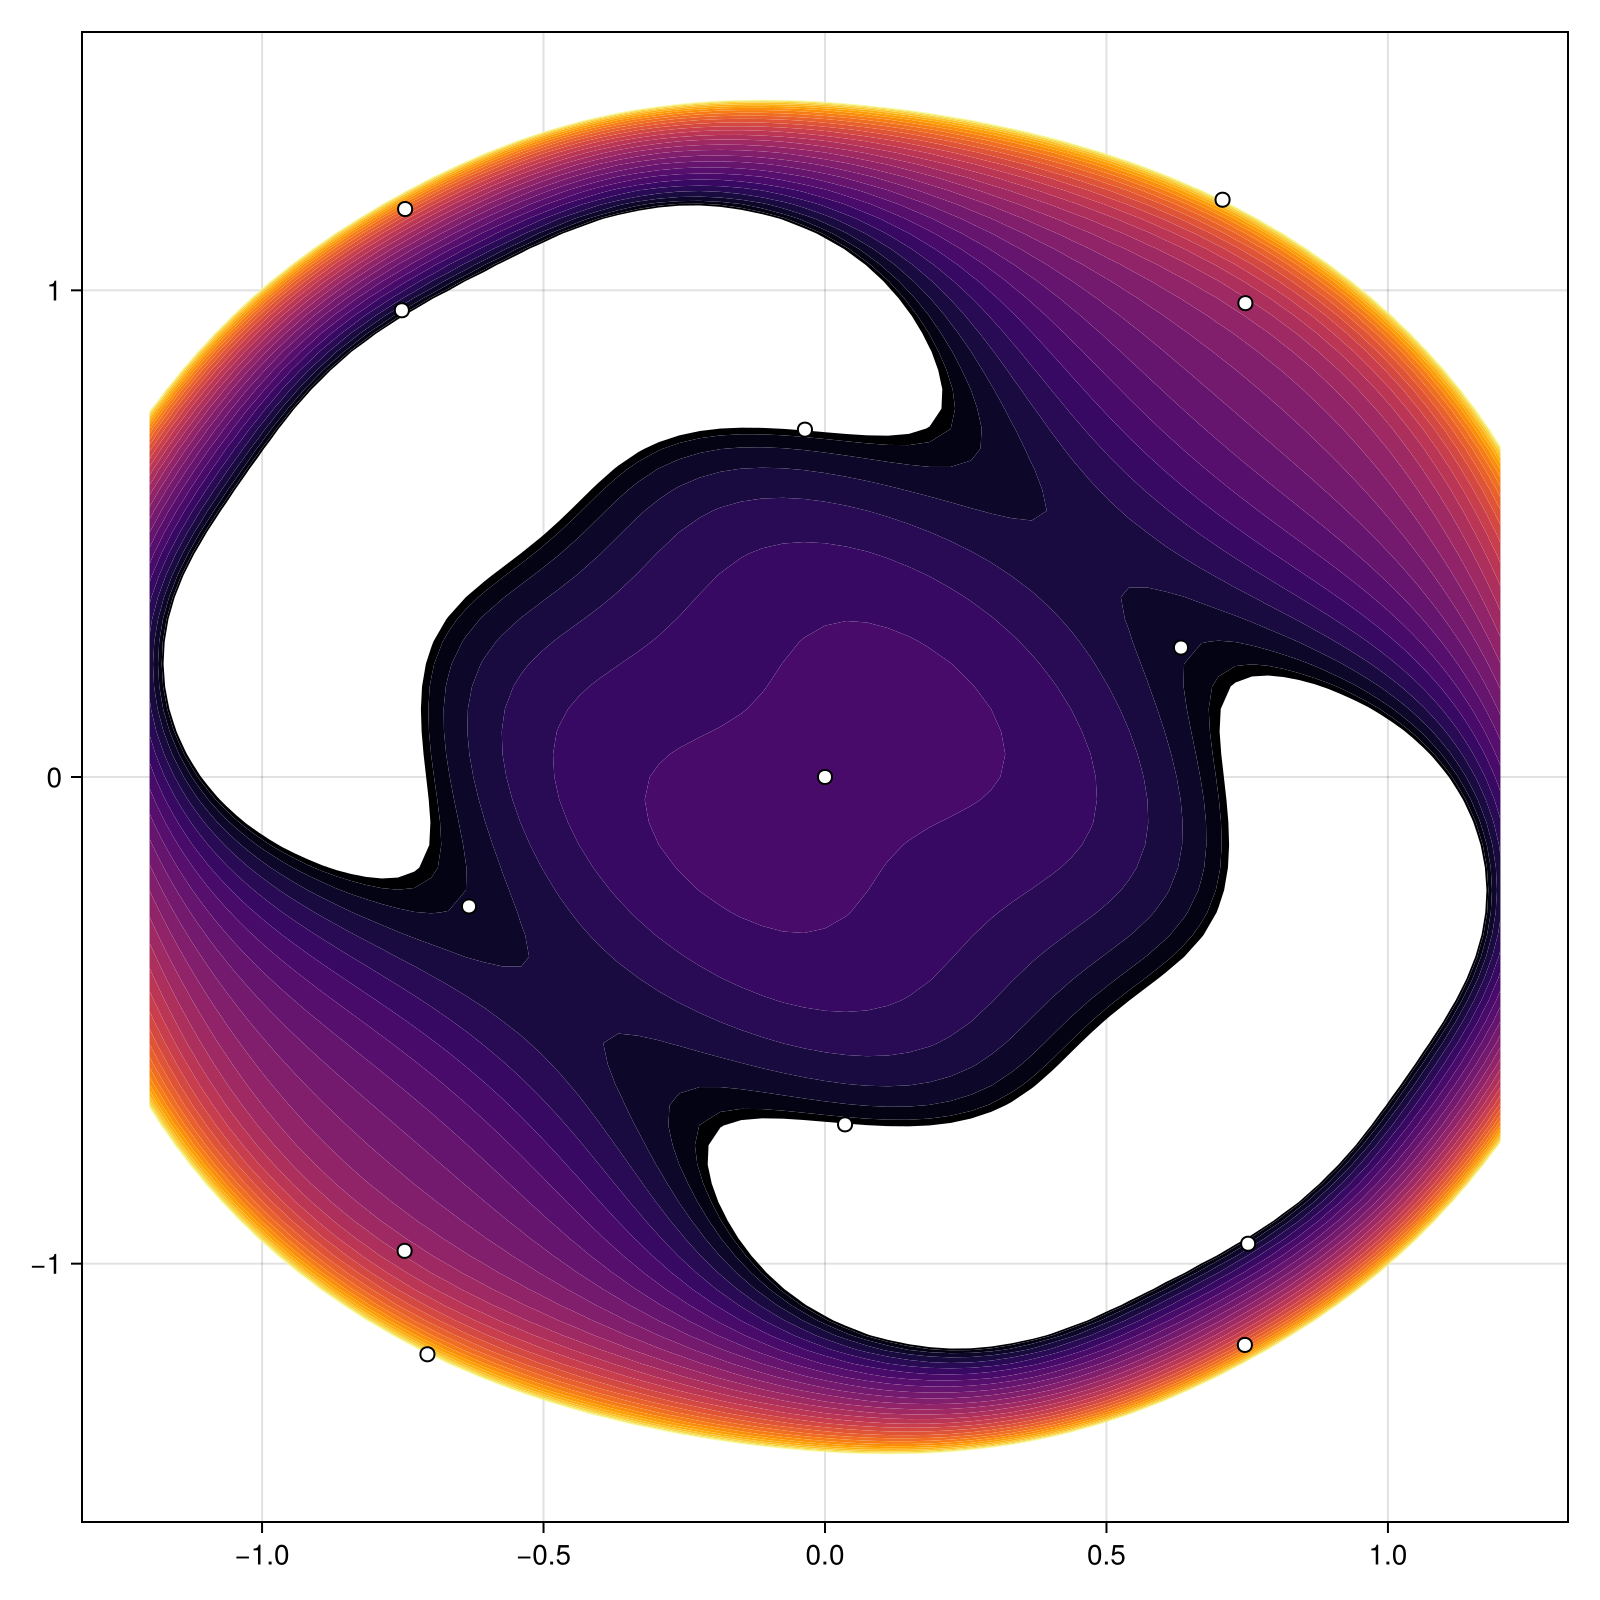

In [7]:
fig_1 = cairo_plot_polyapprox_levelset(pol_cheb, TR, df_cheb, df_min_cheb, chebyshev_levels=true, figure_size=(800, 800))

In [8]:
# fig_2 = cairo_plot_polyapprox_levelset(pol_lege, TR, df_lege, df_min_lege, chebyshev_levels=true, figure_size = (800, 800))

In [9]:
# save("Deuflhard_w_22.pdf", fig_1)

In [10]:
using GLMakie
GLMakie.activate!

activate! (generic function with 1 method)

In [11]:
fig_3d = plot_polyapprox_3d(
    pol_cheb, 
    TR, 
    df_cheb, 
    df_min_cheb,
    z_limits=(-1., 4.2), 
    figure_size = (1600, 1600), 
    fade = true, 
    z_cut = .0
)
display(fig_3d)

GLMakie.Screen(...)

In [14]:
# save("deuflhard_cheb_22_3d_1.png", fig_3d)
GLMakie.closeall()